In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
dataset = [
    "api_data_aadhar_enrolment_0_500000.csv",
    "api_data_aadhar_enrolment_500000_1000000.csv",
    "api_data_aadhar_enrolment_1000000_1006029.csv"
]

In [5]:
df = pd.concat([pd.read_csv(f) for f in dataset], ignore_index=True)
print("Original Data Shape:", df.shape)

Original Data Shape: (1006029, 7)


In [6]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [7]:
df.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df = df.dropna(thresh=int(0.7 * df.shape[1]))

In [10]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


In [11]:
if "age" in df.columns:
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 18, 30, 45, 60, 100],
        labels=["0-18", "19-30", "31-45", "46-60", "60+"]
    )

In [12]:
statepattern = df["state"].value_counts().head(10)

In [31]:
districtpattern=df["district"].value_counts().head(10)

In [32]:
districtpattern

district
Pune                 6515
North 24 Parganas    6404
Barddhaman           5255
Bengaluru            5216
Hyderabad            4866
Malappuram           4650
Jaipur               4562
South 24 Parganas    4507
Murshidabad          4475
K.v. Rangareddy      4450
Name: count, dtype: int64

In [22]:
 plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

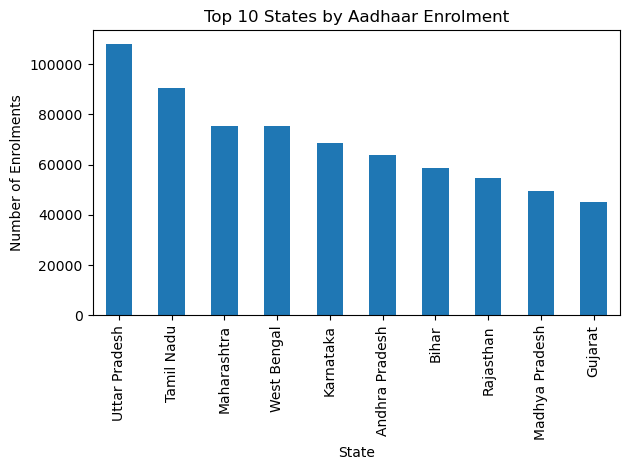

In [28]:
statepattern.plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("State")
plt.ylabel("Number of Enrolments")
plt.tight_layout()
plt.show()

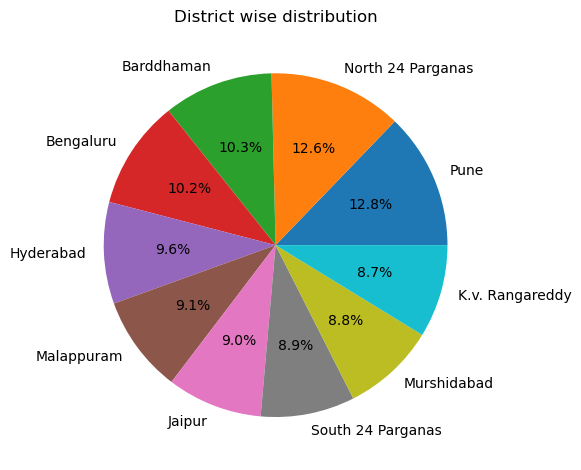

In [33]:
plt.figure()
districtpattern.plot(kind="pie", autopct="%1.1f%%")
plt.title("District wise distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [35]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [37]:
agecolumns = ["age_0_5", "age_5_17", "age_18_greater"]
agedata = df[age_columns].sum()
print(agedata)

age_0_5           3474389
age_5_17          1690909
age_18_greater     166462
dtype: int64


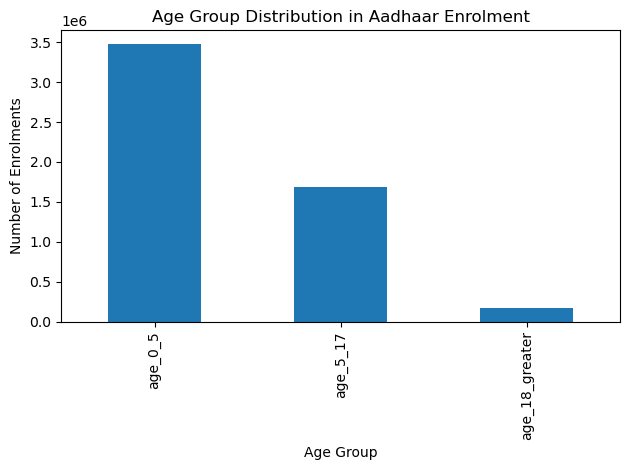

In [38]:
plt.figure()
age_data.plot(kind="bar")
plt.title("Age Group Distribution in Aadhaar Enrolment")
plt.xlabel("Age Group")
plt.ylabel("Number of Enrolments")
plt.tight_layout()
plt.show()

In [39]:
df.to_csv("uidai_clean_data.csv", index=False)
print("Clean dataset saved as uidai_clean_data.csv")

Clean dataset saved as uidai_clean_data.csv
